In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import bernoulli
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [2]:
max_calculated = pd.read_csv('max_calculated.csv')
max_elemental = pd.read_csv('max_elemental.csv')

In [61]:
max_calculated.head()

,prettyformula,n,a,c,dMX,dMM,dMA,dAA,rMX,rMA,...,volume.pa,density,dEf,E_pa,dH,M,A,X,PU_label,year
0,Sc2AlC,1,3.29643,15.0652,1.24333,2.48666,2.52297,7.53260,2.27333,3.16031,...,17.721542,3.019640,-436.327728,-6.845649,102.905099,Sc,Al,C,0.0,NaN
1,Sc2SiC,1,3.29946,13.9618,1.24288,2.48576,2.24757,6.98090,2.27455,2.94625,...,16.453848,3.280130,-538.204281,-7.366979,104.172803,Sc,Si,C,0.0,NaN
2,Sc2PC,1,3.36425,12.7855,1.25055,2.50110,1.94583,6.39275,2.31011,2.74936,...,15.665183,3.521822,-812.661877,-7.638910,155.755765,Sc,P,C,0.0,NaN
3,Sc2SC,1,3.45208,11.9614,1.22664,2.45328,1.76371,5.98070,2.34028,2.66138,...,15.430609,3.604584,-1312.804716,-7.819844,-158.874592,Sc,S,C,0.0,NaN
4,Sc2CuC,1,3.38243,12.9294,1.20554,2.41107,2.02681,6.46470,2.29498,2.81453,...,16.013132,4.289720,-290.025338,-6.787754,104.865173,Sc,Cu,C,0.0,NaN


In [4]:
max_elemental.head()

,compound_formula,M_element,A_element,X_element,M_M_atomic_number,M_M_atomic_mass,M_M_molar_volume,M_M_density,M_M_atomic_radius,M_M_atomic_radius_calculated,...,X_X_average_ionic_radius,X_X_average_cationic_radius,X_X_average_anionic_radius,X_X_electron_affinity,X_X_electronegativity,X_X_first_ionization_energy,X_X_second_ionization_energy,X_X_valence_electrons,X_X_row,X_X_group
0,Sc2AlC,Sc,Al,C,21,44.955912,10,4.495591,1.6,1.84,...,0.3,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,14
1,Sc2SiC,Sc,Si,C,21,44.955912,10,4.495591,1.6,1.84,...,0.3,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,14
2,Sc2PC,Sc,P,C,21,44.955912,10,4.495591,1.6,1.84,...,0.3,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,14
3,Sc2SC,Sc,S,C,21,44.955912,10,4.495591,1.6,1.84,...,0.3,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,14
4,Sc2MnC,Sc,Mn,C,21,44.955912,10,4.495591,1.6,1.84,...,0.3,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,14


In [5]:
whole_data = max_calculated.merge(max_elemental, left_on='prettyformula',
                                  right_on='compound_formula')

In [6]:
whole_data = pd.get_dummies(data=whole_data,
                            prefix='group', columns=['X_X_group'], prefix_sep='_')

In [7]:
whole_data.head()

,prettyformula,n,a,c,dMX,dMM,dMA,dAA,rMX,rMA,...,X_X_average_cationic_radius,X_X_average_anionic_radius,X_X_electron_affinity,X_X_electronegativity,X_X_first_ionization_energy,X_X_second_ionization_energy,X_X_valence_electrons,X_X_row,group_14,group_15
0,Sc2AlC,1,3.29643,15.0652,1.24333,2.48666,2.52297,7.53260,2.27333,3.16031,...,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,True,False
1,Sc2SiC,1,3.29946,13.9618,1.24288,2.48576,2.24757,6.98090,2.27455,2.94625,...,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,True,False
2,Sc2PC,1,3.36425,12.7855,1.25055,2.50110,1.94583,6.39275,2.31011,2.74936,...,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,True,False
3,Sc2SC,1,3.45208,11.9614,1.22664,2.45328,1.76371,5.98070,2.34028,2.66138,...,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,True,False
4,Sc2CuC,1,3.38243,12.9294,1.20554,2.41107,2.02681,6.46470,2.29498,2.81453,...,0.3,0.0,1.262114,2.55,11.260288,24.383154,2,2,True,False


Method k-fold cross validated, evaluated by their true positive rate.
Against the 63 synthesized MX_enes.

In [8]:
whole_data[whole_data['n'] == 1]['PU_label'].shape

(1014,)

In [9]:
(77/1014)*100

7.593688362919132

Features retained in the article followed by \\ the name in the dataframe :

n : number of layers \\ n

a : in plane lattice constant \\ a

c : out of plane lattice constant \\ c

d_MM,MX,MA,AA : layer distances \\ dMM,MX,MA,AAA

r_MX,MA : bonds lengths \\ rMX,MA

m : mass \\ mass

V : volume \\ volume

rho : density \\density

Energy : total energy

E_pa : energy per atom \\ E_pa

E_form formation energy \\ dEf

E_coh : cohesive energy

e_M,A,X : Bader charges on M,A,X atoms respectively \\ e_M,A,X

Z : atomic number 

N_V : number of valence electrons \\ i_valence_electron $i \in {M,A,X}$

g_P : group number \\ i_group $i \in {M,A,X}$

p_p : period number \\ i_row $i \in {M,A,X}$

Xe : electronegativity \\ i_electronegativity $i \in {M,A,X}$

EA : electron affinity \\ i_electron_affinity
$i \in {M,A,X}$

IE1 : 1st ionization potential \\ i_first_ionization_energy $i \in {M,A,X}$

IE2 : 2nd ionization potential \\ i_second_ionization_energy $i \in {M,A,X}$

E_chem : chemical potential 

E_atom : atom-in-box potential

In [10]:
whole_data = whole_data.set_index(keys='prettyformula',drop=True)

In [11]:
whole_data = whole_data.replace(to_replace=True,value=14)
whole_data = whole_data.replace(to_replace=False,value=15)
whole_data = whole_data.drop(['M_element','X_element','A_element',
                             'M','A','X','year','compound_formula'],axis=1)

/tmp/ipykernel_2946/2182449801.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  whole_data = whole_data.replace(to_replace=False,value=15)


In [12]:
first_tree = DecisionTreeClassifier().fit(X=whole_data.drop(['PU_label'],axis=1), y=whole_data['PU_label'])

In [39]:
list_of_imp = first_tree.feature_importances_
list_of_names = np.array(np.delete(whole_data.columns,np.where(whole_data.columns == 'PU_label')))

In [40]:
features_importance = np.hstack((list_of_imp.reshape(list_of_imp.shape[0],1),
                                 list_of_names.reshape(list_of_names.shape[0],1)))

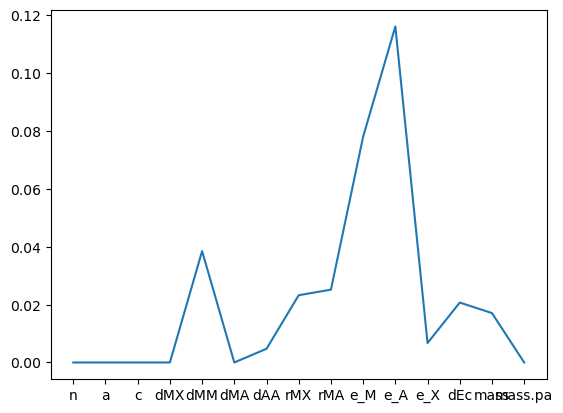

In [32]:
plt.plot(list_of_names[:15],list_of_imp[:15])

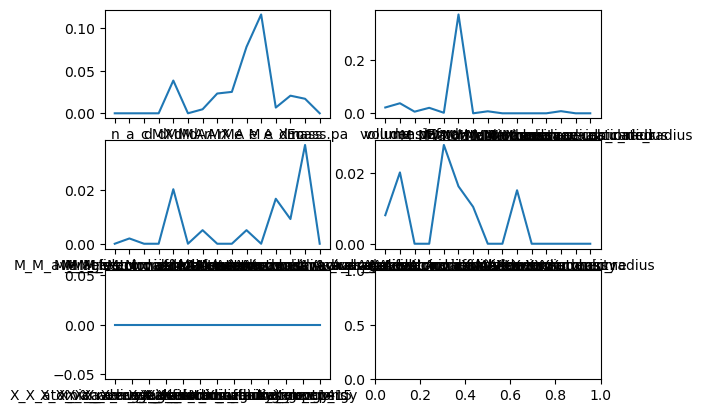

In [48]:
fig, axs = plt.subplots(3,2)
axs[0,0].plot(list_of_names[:15],list_of_imp[:15])
axs[0,1].plot(list_of_names[15:30],list_of_imp[15:30])
axs[1,0].plot(list_of_names[30:45],list_of_imp[30:45])
axs[1,1].plot(list_of_names[45:60],list_of_imp[45:60])
axs[2,0].plot(list_of_names[60:],list_of_imp[60:])

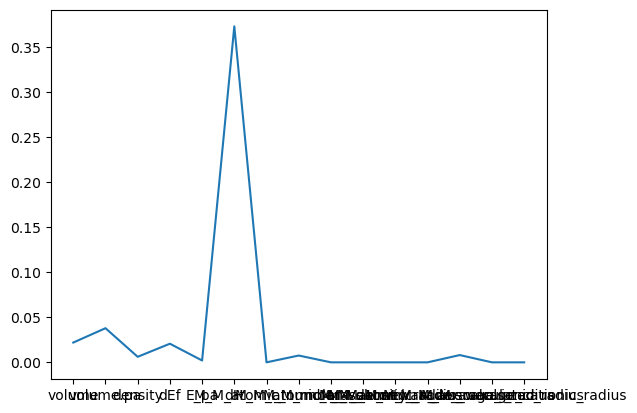

In [50]:
plt.plot(list_of_names[15:30],list_of_imp[15:30])

In [57]:
features_df = pd.DataFrame(features_importance)
features_df.columns = ['value','name']
features_df = features_df.sort_values('value',ascending=False)

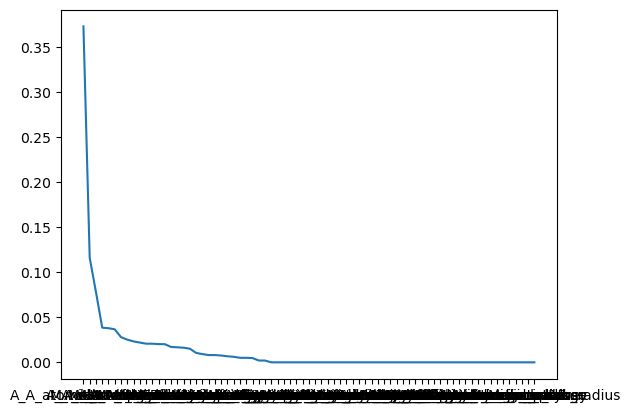

In [58]:
plt.plot(features_df['name'],features_df['value'])

In [59]:
features_df.head()

,value,name
20,0.372909,dH
10,0.116049,e_A
9,0.077974,e_M
4,0.03847,dMM
16,0.037891,volume.pa
